In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import itertools

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/'

In [4]:
df = pd.read_csv(data_path+'data_all.csv')

In [5]:
df.drop(columns=['Florida', 'Idaho', 'Indiana', 'Maine', 'Nevada', 'Oregon',
       'Rhode Island', 'South Carolina', 'Utah', 'Vermont', 'Virginia',
       'Wisconsin'], axis=1, inplace=True)
df.Class.replace({"No CD":0, "Mild CD":1, "Moderate CD":2, "Severe CD":3}, inplace=True)
df.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PERSDOC3,CHECKUP1,EXERANY2,CVDINFR4,Insur_CHIP,Insur_Employer/Union,...,no_of_cancers_Only_one,no_of_cancers_Three_or_more,no_of_cancers_Two,SLEPTIM1,WEIGHT2,HEIGHT3,CNCRAGE,_AGE80,_DRNKWK2,Class
0,1,2,0,0,1,1,1,0,0,0,...,0,0,0,8.0,63.502880,1.8034,0.0,79.0,2.300000e-01,1
1,0,2,0,0,1,3,1,0,0,0,...,0,0,0,6.0,77.110640,1.5748,0.0,62.0,5.397605e-81,0
2,1,3,4,0,2,1,1,0,0,0,...,0,0,0,7.0,82.997069,1.6764,0.0,79.0,2.300000e-01,1
3,1,1,0,0,1,1,1,0,0,0,...,0,0,0,8.0,77.110640,1.7780,0.0,80.0,5.397605e-81,0
4,1,4,1,3,1,1,1,1,0,0,...,0,0,0,7.0,102.058200,1.7780,0.0,68.0,4.700000e-01,0


In [6]:
df.shape

(63883, 130)

In [8]:
df['Binary'] = df.Class.map({0:0,1:1,2:1,3:1})
df.Binary.value_counts()

Binary
0    57198
1     6685
Name: count, dtype: int64

In [9]:
subdf = df[df['Binary']!=0]
subdf.SEXVAR.value_counts()

SEXVAR
0    3672
1    3013
Name: count, dtype: int64

In [ ]:
# dfs = []
# for file in os.listdir(data_path):
#   if file.endswith('.csv'):
#     df = pd.read_csv(data_path+file)
#     df.set_index('Unnamed: 0', inplace=True)
#     dfs.append(df)

In [ ]:
# df1, df2, df3, df4, df5 = dfs
# df2.drop('Class', axis=1, inplace=True)

In [ ]:
# df_full = pd.concat([df1, df2, df3, df4, df5], axis=1, join="inner")
# df_full.reset_index(inplace=True)
# df_full.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# column_to_move = 'Class'

# new_columns = [col for col in df_full.columns if col != column_to_move]
# new_columns.append(column_to_move)
# df_full = df_full[new_columns]


In [ ]:
# columns_to_convert = ['_ASTHMS1__1.0', '_ASTHMS1__2.0', '_ASTHMS1__3.0',
#                       '_EDUCAG__1.0', '_EDUCAG__2.0', '_EDUCAG__3.0', '_EDUCAG__4.0',
#                       '_SMOKER3__1.0', '_SMOKER3__2.0', '_SMOKER3__3.0', '_SMOKER3__4.0']

# # Convert True/False to 1/0
# df_full[columns_to_convert] = df_full[columns_to_convert].astype(int)

# # Display the first few rows of the DataFrame
# df_full.head()

In [ ]:
# df_full._DRDXAR2.fillna(0, inplace=True)
# df_full.SDHSTRE1.fillna(5, inplace=True)

In [ ]:
# df_full.to_csv(data_path+'df_full.csv', index=False)

In [ ]:
# df_full = pd.read_csv(data_path+'df_full.csv')

In [ ]:
for column in df.columns:
  if df[column].unique().size > 10:
    print(column, df[column].unique().size)

PHYSHLTH 31
MENTHLTH 31
SLEPTIM1 23
WEIGHT2 407
HEIGHT3 95
CNCRAGE 96
_AGE80 49
_DRNKWK2 168


In [ ]:
num_cols = ['PHYSHLTH', 'MENTHLTH', 'SLEPTIM1', 'WEIGHT2', 'HEIGHT3', 'CNCRAGE', '_AGE80', '_DRNKWK2']
cat_cols = [col for col in df.columns if col not in num_cols][:-1]

In [ ]:
def similarity(obs1, obs2):
  cat_sim = 0
  for col in cat_cols:
    subdf = df[col]
    if obs1[col] != obs2[col]:
      continue
    else:
      level = obs1[col]
      weight = np.sum(subdf == level)/len(subdf)
      cat_sim += 1/weight**2

  return cat_sim

In [ ]:
subset1 = np.random.choice(df.index, size=200, replace=False)
subset2 = np.random.choice(df.index, size=200, replace=False)

In [ ]:
A = np.zeros((200, 200))
for i in range(200):
  for j in range(i, 200):
    A[i, j] = similarity(df.loc[subset1[i]], df.loc[subset1[j]])
    A[j, i] = A[i, j]

In [ ]:
d2 = A.copy()

In [ ]:
np.round(d2, 3)

array([[1074.551,  163.629,  160.586, ...,  152.133,  152.166,  164.845],
       [ 163.629, 1441.836,  162.819, ...,  167.135,  385.124,  145.337],
       [ 160.586,  162.819,  256.626, ...,  192.806,  174.447,  148.314],
       ...,
       [ 152.133,  167.135,  192.806, ..., 1183.09 ,  151.646,  174.133],
       [ 152.166,  385.124,  174.447, ...,  151.646, 2309.188,  138.698],
       [ 164.845,  145.337,  148.314, ...,  174.133,  138.698, 1092.54 ]])

In [ ]:
threshold = 300

A = (d2 < threshold).astype(np.float32)
np.fill_diagonal(A, 0)

In [ ]:
dd = np.sum(A, axis=1)
D = np.diag(dd)

# Compute the graph Laplacian
L = D - A

In [ ]:
w, v = np.linalg.eigh(L)

## Try using other evecs, such as the third and the forth lowest,
## to see how that affects the clustering assignment
evec = v[:, 1]

Text(0.5, 1.0, 'Eigenvec ordered entries')

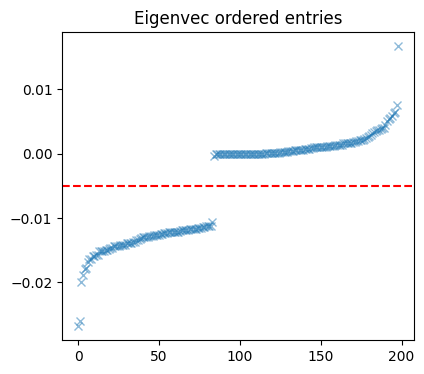

In [ ]:
s = np.argsort(evec)

fig = plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(evec[s][:-1], 'x', alpha=0.5)
plt.axhline(y=-0.005, color='red', linestyle='--')
plt.title("Eigenvec ordered entries")

In [ ]:
labels = evec < -0.005
len(labels)

200

In [ ]:
subset1_1 = subset1[labels]
subset1_2 = subset1[~labels]

In [ ]:
subset = df.loc[subset1][['Class']]
subset['Cluster'] = 0

subset.loc[subset1_1, 'Cluster'] = 1
subset.loc[subset1_2, 'Cluster'] = 2
subset['Binary'] = subset.Class.map({0:0,1:1,2:1,3:1})

<Figure size 1000x400 with 0 Axes>

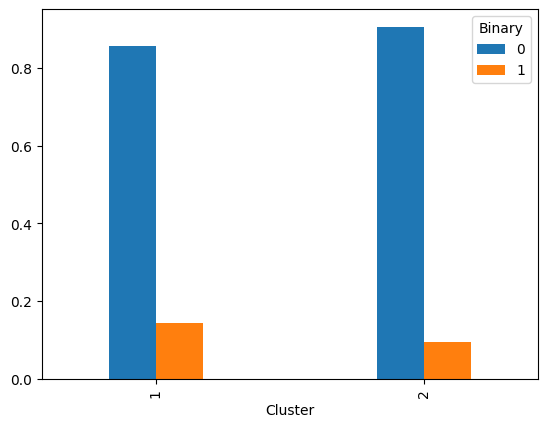

In [ ]:
fig = plt.figure(figsize=(10, 4))

grouped = subset.groupby(['Cluster', 'Binary']).size().unstack()
frequencies = grouped.div(grouped.sum(axis=1), axis=0)
frequencies.plot(kind='bar', width=0.35)
plt.show()

In [ ]:
df2 = df[df['Class']!=0]

In [ ]:
X = df2.drop(columns=['Class', 'DECIDE'])
y = df2.Class

In [ ]:
from scipy.stats import pointbiserialr

for col in X.columns:
  if X[col].unique().size == 2:
    corr, _ = pointbiserialr(X[col], y)

    print(f"{col}: {corr}")

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
split=list(enumerate(skf.split(df2, df2.Class)))
folds={i[0]:i[1][1] for i in split}
train_idx = np.concatenate((folds[0], folds[1], folds[2], folds[3]))
# val_idx = folds[3]
test_idx =  folds[4]

X_train = X.iloc[train_idx]
# X_val = X.iloc[val_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
# y_val = y.iloc[val_idx]
y_test = y.iloc[test_idx]

In [ ]:
1/(y_train.value_counts()/len(y_train))

Class
1    1.801887
2    3.221687
3    7.427778
Name: count, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


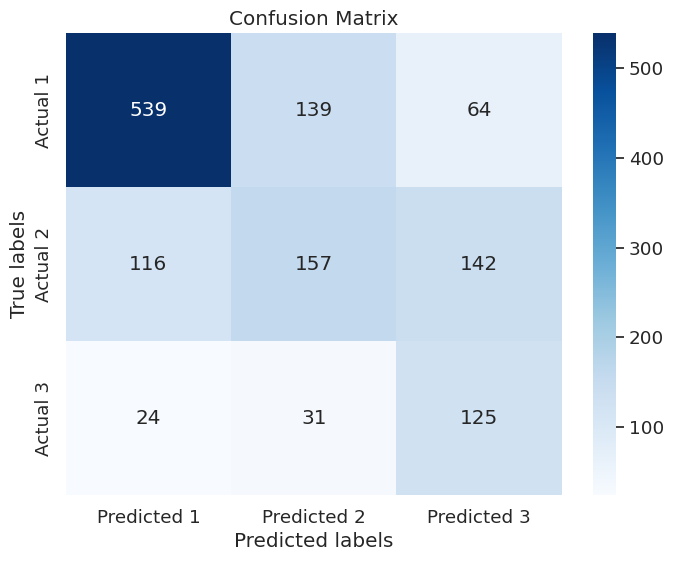

In [ ]:
#@title LogReg
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(class_weight={0:0.3,1:0.7})
clf = LogisticRegression(class_weight='balanced', penalty="l2", C=10)

clf.fit(X_train, y_train)
# y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3'],
            yticklabels=['Actual 1', 'Actual 2', 'Actual 3'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.6140613313388182

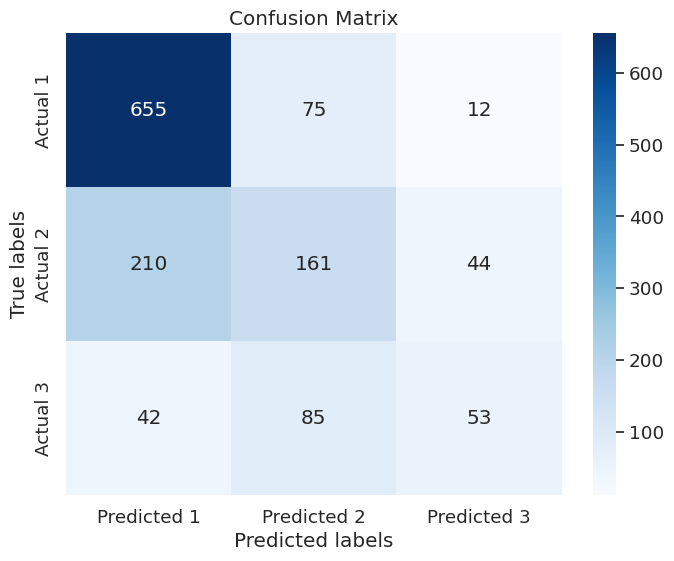

In [ ]:
#@title Random Forest
from sklearn.ensemble import RandomForestClassifier

# clf = LogisticRegression(class_weight={0:0.3,1:0.7})
clf = RandomForestClassifier(class_weight='balanced')

clf.fit(X_train, y_train)
# y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[ 'Predicted 1', 'Predicted 2', 'Predicted 3'],
            yticklabels=[ 'Actual 1', 'Actual 2', 'Actual 3'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.649962602842184

In [ ]:
#@title MLP
import torch # torch

from torchvision import transforms # transform is used for data pre-processing
from torch.utils import data as Data
from torch.utils.data import Dataset # for dataset construction
from torch.utils.data import DataLoader

import torch.optim as optim

import numpy as np

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
XTrain = torch.from_numpy(X_train.values)
# XVal = torch.from_numpy(X_val.values)
XTest = torch.from_numpy(X_test.values)

yTrain = torch.from_numpy((y_train-1).values)
# yVal = torch.from_numpy(y_val.values)
yTest = torch.from_numpy((y_test-1).values)

In [ ]:
min = torch.min(XTrain, dim = 0); max = torch.max(XTrain, dim = 0)
norm_dict_min_max = {'min': min[0], 'max': max[0]}

In [ ]:
class MyDataset(Dataset):
  def __init__(self, X, y, norm_dict=None):
    self.X = X
    self.y = y
    self.norm_dict = norm_dict

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    if self.norm_dict is not None:
      min = self.norm_dict['min']
      max = self.norm_dict['max']
      X = (self.X[idx] - min) / (max - min)
    else:
      X = self.X[idx]
    return X, self.y[idx]

train_dataset = MyDataset(XTrain, yTrain, norm_dict = norm_dict_min_max)
# val_dataset = MyDataset(XVal, yVal)
test_dataset = MyDataset(XTest, yTest, norm_dict = norm_dict_min_max)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(XTrain.shape[1], 256)
        # self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        # self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        # self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 32)
        # self.dropout4 = nn.Dropout(0.5)
        self.fc5 = nn.Linear(32, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        # x = self.dropout3(x)
        x = F.relu(self.fc4(x))
        # x = self.dropout4(x)
        x = self.fc5(x)
        return x

In [ ]:
torch.tensor(sum(y_train-1)/(np.bincount(y_train-1)*2))

tensor([0.5222, 0.9337, 2.1528], dtype=torch.float64)

In [ ]:
model = SimpleMLP()

# loss = nn.CrossEntropyLoss(weight=torch.tensor(sum(y_train-1)/(np.bincount(y_train-1)*2), dtype=torch.float32))
loss = nn.CrossEntropyLoss()
# loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for i in range(epochs):
  model.train()
  train_acc, val_acc = [], []

  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(train_loader):
    X = X.float()
    optimizer.zero_grad()
    outputs = model(X)

    loss_value = loss(outputs, y)
    loss_value.backward()
    optimizer.step()

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()

    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  train_acc.append(accuracy_score(true_labs, pred_labs))
  if i % 10 == 0:
    print(f'Epoch: [{i+1}/{epochs}]: training accuracy is {train_acc[-1]:.4f}')

  model.eval()
  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(test_loader):
    X = X.float()
    outputs = model(X)

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()
    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  val_acc.append(accuracy_score(true_labs, pred_labs))
  if i % 10 == 0:
    print(f'Epoch: [{i+1}/{epochs}]: validation accuracy is {val_acc[-1]:.4f}')

Epoch: [41/100]: training accuracy is 0.5550
Epoch: [41/100]: validation accuracy is 0.5550


KeyboardInterrupt: 

In [ ]:
accuracy_score(true_labs, pred_labs)

0.7893706950532248

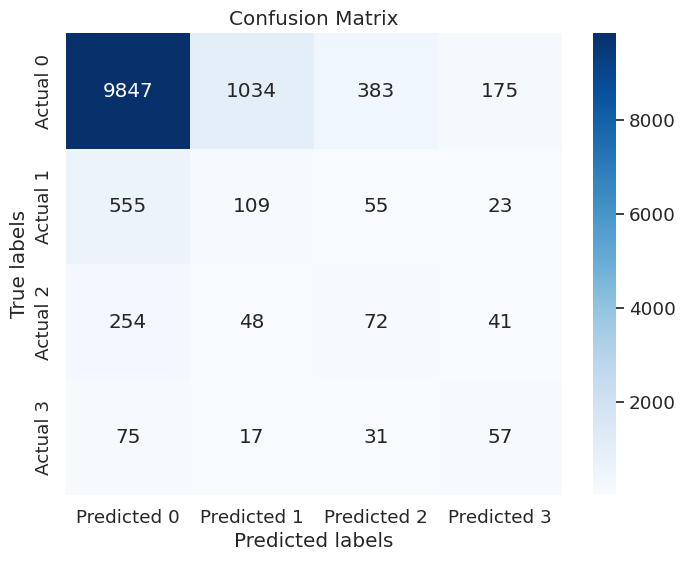

In [ ]:
conf_matrix = confusion_matrix(true_labs, pred_labs)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(model)

SimpleMLP(
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=4, bias=True)
)


In [ ]:
(1266+974+738)/3215

0.9262830482115085

In [ ]:
df[df['DECIDE'] == 0].Class.value_counts()

Class
0    53983
1     2736
2      809
3      162
Name: count, dtype: int64